# <center>CS-485 Data Science and Applications</center>
## <center>Assignment 4</center>
### <center>Alexandros Angelakis csdp1363, angelakis@csd.uoc.gr</center>

Classifying MNIST using Multi-Layer Perceptron (MLP)

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)

def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title="label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)

    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])

    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])

    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [2]:
# Load and preprocess the MNIST dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28*28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_images.shape, train_labels.shape)

(60000, 784) (60000, 10)


I will add to each of my model Dropout Layers, in order to be more robust and to generalize the training data. We don't want our model to overfit :D. There are more techniques of generalizing a model (normalization terms, momentum etc.) but I didn't want to overdo it.

In [3]:
# Build an MLP model
num_classes = train_labels.shape[1] # 10 for MNIST
hid_layers = 2

model = Sequential()
model.add(Input(shape=(train_images.shape[1],))) # Input Layer

for h_layer in np.arange(hid_layers + 1): # Hidden Layers
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax')) # Output Layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [4]:
# Compile the model, choose optimizer, loss and metrics
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train the model and save the history. Define epochs, batch_size and validation_split
epochs = 19
batch_size = 64

history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/19
750/750 [==============================] - 1s 1ms/step - loss: 0.5717 - accuracy: 0.8169 - val_loss: 0.1713 - val_accuracy: 0.9485
Epoch 2/19
750/750 [==============================] - 1s 1ms/step - loss: 0.2642 - accuracy: 0.9238 - val_loss: 0.1374 - val_accuracy: 0.9616
Epoch 3/19
750/750 [==============================] - 1s 1ms/step - loss: 0.2152 - accuracy: 0.9377 - val_loss: 0.1156 - val_accuracy: 0.9664
Epoch 4/19
750/750 [==============================] - 1s 1ms/step - loss: 0.1846 - accuracy: 0.9470 - val_loss: 0.1094 - val_accuracy: 0.9690
Epoch 5/19
750/750 [==============================] - 1s 1ms/step - loss: 0.1651 - accuracy: 0.9530 - val_loss: 0.0998 - val_accuracy: 0.9721
Epoch 6/19
750/750 [==============================] - 1s 1ms/step - loss: 0.1523 - accuracy: 0.9566 - val_loss: 0.0938 - val_accuracy: 0.9742
Epoch 7/19
750/750 [==============================] - 1s 1ms/step - loss: 0.1436 - accuracy: 0.9598 - val_loss: 0.0906 - val_accuracy: 0.9744
Epoch 

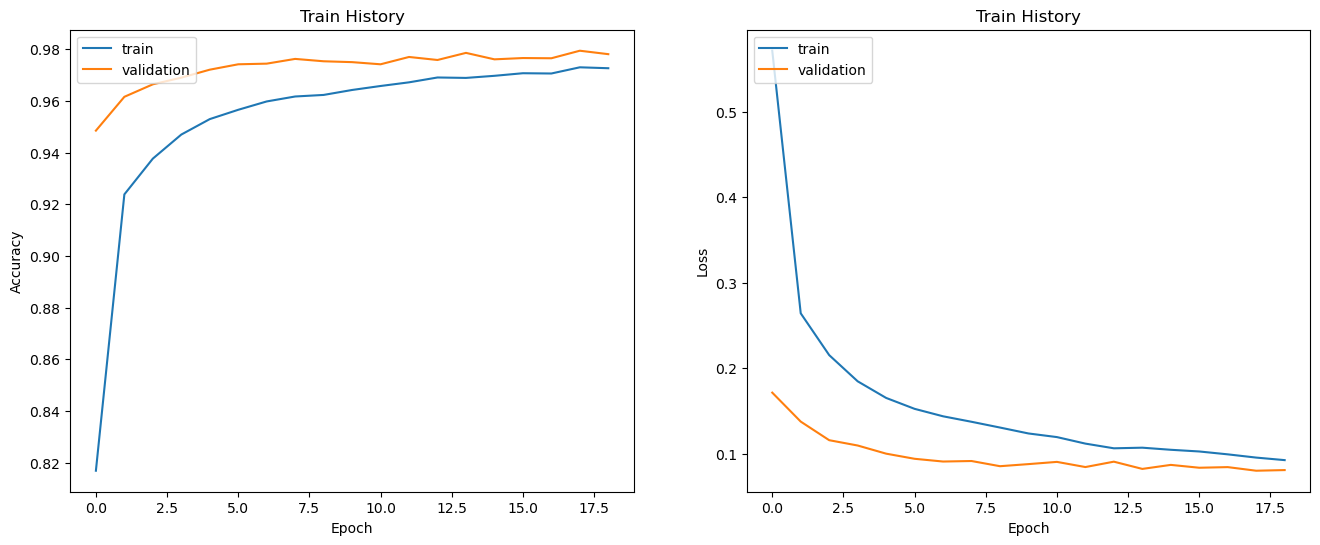

In [6]:
# Plot training & validation accuracy values and loss values per epoch
show_train_history(history)

Test loss: 0.07204435765743256
Test accuracy: 0.9801999926567078


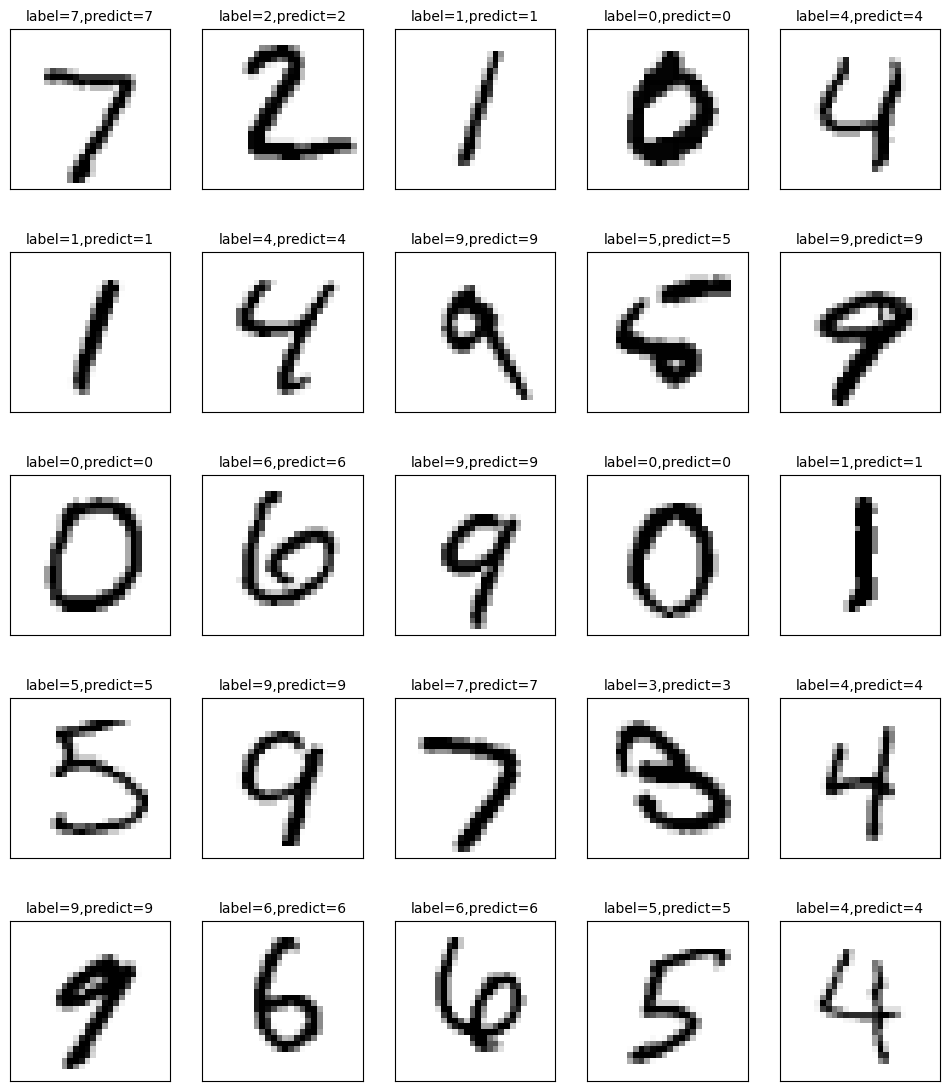

In [7]:
# Evaluate the model on the test set and report test accuracy
scores, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', acc)

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

i = 0  # start from 0
j = 25 # end at 25

(_, _), (x_test_image, y_test_label) = mnist.load_data()
plot_images_labels_prediction(x_test_image,y_test_label,predicted_classes,i,j)

We can see that our classifier predicts perfectly every digit from the above plot.

In [8]:
# Explore the impact of different hyper-parameters e.g. number of hidden layers on training and testing performance
num_hid_layers = np.array([2, 4, 6, 8, 10]) # i
epochs = np.array([5, 10, 15, 20, 25]) # j
batch_size = np.array([32, 64, 128, 256, 512]) # k

accuracies = np.zeros((5, 5, 5))
val_accuracies = np.zeros((5, 5, 5))
loss = np.zeros((5, 5, 5))
val_loss = np.zeros((5, 5, 5))

for i, hid_layers in enumerate(num_hid_layers):
    for j, epoch in enumerate(epochs):
        for k, bsize in enumerate(batch_size):
            model = Sequential()
            model.add(Input(shape=(train_images.shape[1],))) # Input Layer

            for h_layer in np.arange(hid_layers + 1): # Hidden Layers
                model.add(Dense(256, activation='relu'))
                model.add(Dropout(0.5))

            model.add(Dense(num_classes, activation='softmax'))

            model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

            train_history = model.fit(train_images, train_labels, epochs=epoch, batch_size=bsize, validation_split=0.2, verbose=0)

            accuracies[i][j][k] = train_history.history["accuracy"][-1]
            val_accuracies[i][j][k] = train_history.history["val_accuracy"][-1]  
            loss[i][j][k] = train_history.history["loss"][-1]
            val_loss[i][j][k] = train_history.history["val_loss"][-1]
            
            test_loss, acc = model.evaluate(test_images, test_labels, verbose=0)
            print(f'Model with {hid_layers} hidden layers, trained with {epoch} epochs and {bsize} batch size has test loss: {test_loss} and test accuracy: {acc}')

Model with 2 hidden layers, trained with 5 epochs and 32 batch size has test loss: 0.10925432294607162 and test accuracy: 0.9668999910354614
Model with 2 hidden layers, trained with 5 epochs and 64 batch size has test loss: 0.1037696897983551 and test accuracy: 0.9702000021934509
Model with 2 hidden layers, trained with 5 epochs and 128 batch size has test loss: 0.09873556345701218 and test accuracy: 0.9714999794960022
Model with 2 hidden layers, trained with 5 epochs and 256 batch size has test loss: 0.09386850893497467 and test accuracy: 0.9721999764442444
Model with 2 hidden layers, trained with 5 epochs and 512 batch size has test loss: 0.10598786920309067 and test accuracy: 0.9690999984741211
Model with 2 hidden layers, trained with 10 epochs and 32 batch size has test loss: 0.09290599077939987 and test accuracy: 0.974399983882904
Model with 2 hidden layers, trained with 10 epochs and 64 batch size has test loss: 0.08828438073396683 and test accuracy: 0.9746999740600586
Model with

As we can see from the test accuracies, the model with the highest one is is the model with 2 hidden layers, trained with 25 epochs and with a batch size of 512. Their last accuracy, validation accuracy, loss and validation loss in training was: 

In [12]:
print('Best Model\'s metrics:')
print('Training Accuracy:', accuracies[0][4][4])
print('Validation Accuracy:', val_accuracies[0][4][4])
print('Training Loss:', loss[0][4][4])
print('Validation Loss:', val_loss[0][4][4])

Best Model's metrics:
Training Accuracy: 0.9804166555404663
Validation Accuracy: 0.9781666398048401
Training Loss: 0.06596285104751587
Validation Loss: 0.08034954220056534


Model trained with 10.0% of the training set as validation set, with test loss: 0.0720687136054039 and test accuracy: 0.9804999828338623


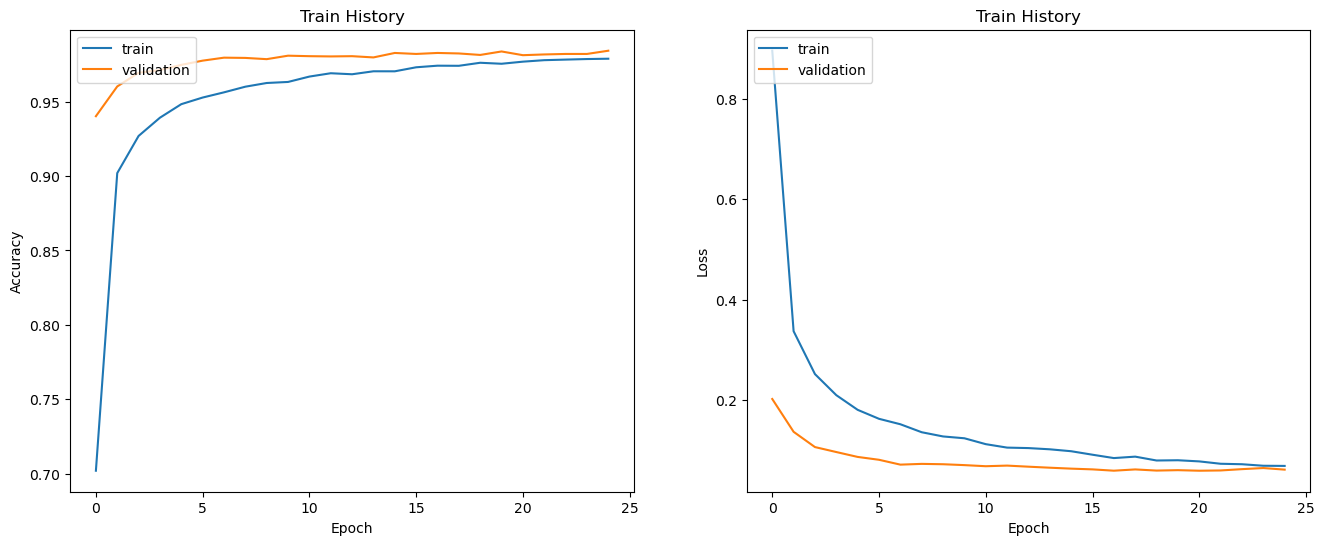

Model trained with 20.0% of the training set as validation set, with test loss: 0.07592329382896423 and test accuracy: 0.9785000085830688


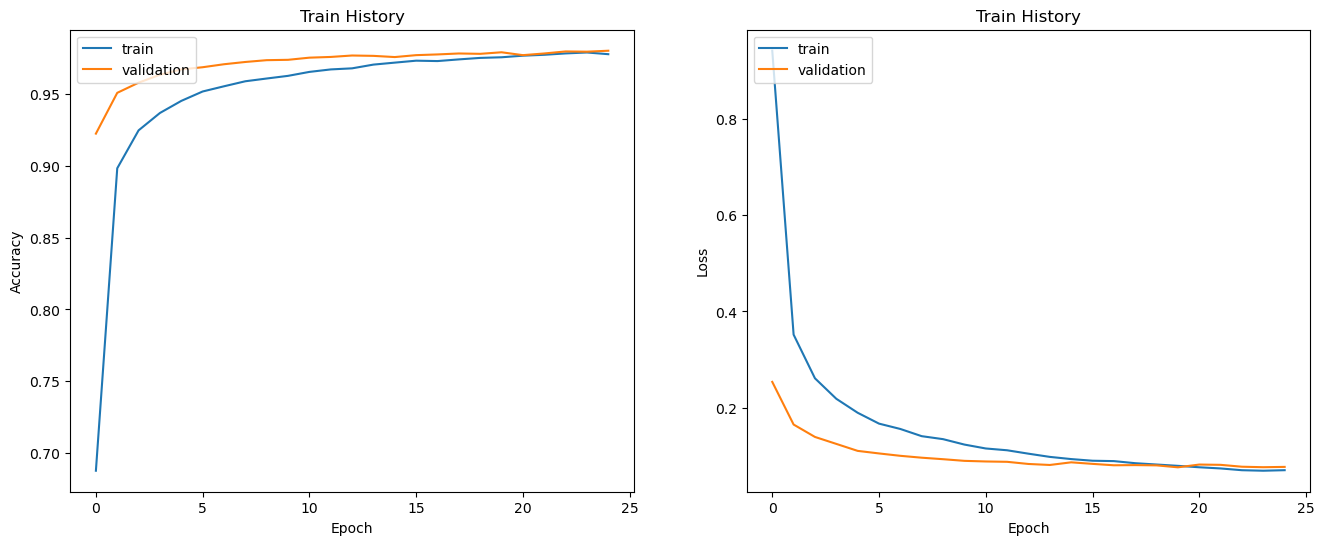

Model trained with 30.0% of the training set as validation set, with test loss: 0.08152806758880615 and test accuracy: 0.978600025177002


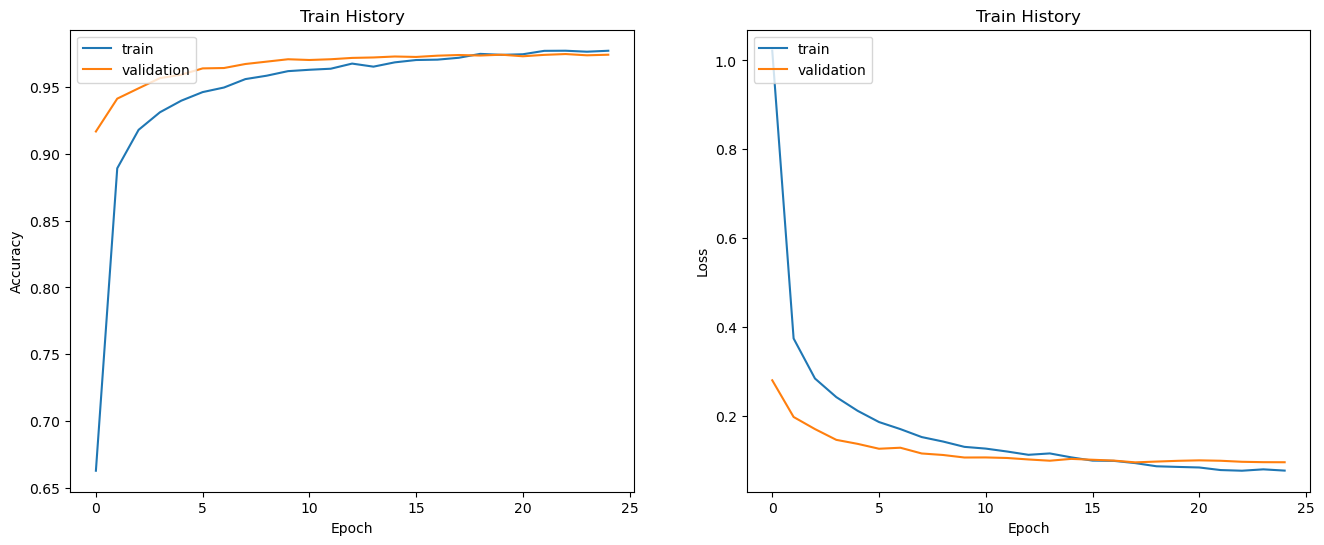

Model trained with 40.0% of the training set as validation set, with test loss: 0.08166730403900146 and test accuracy: 0.979200005531311


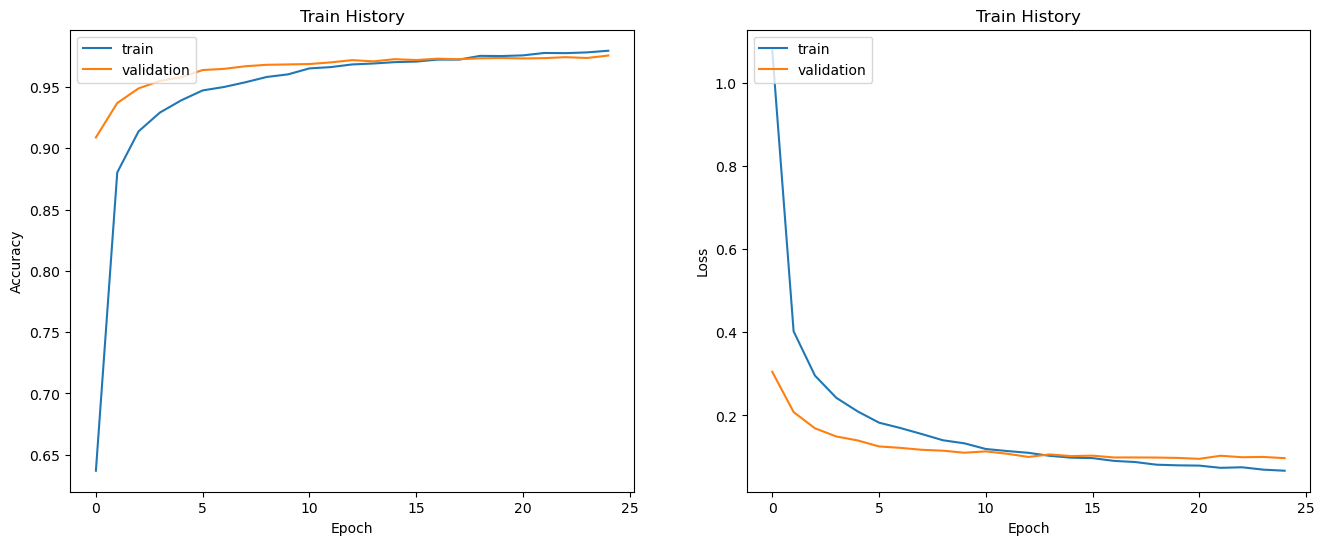

Model trained with 50.0% of the training set as validation set, with test loss: 0.0961906760931015 and test accuracy: 0.9751999974250793


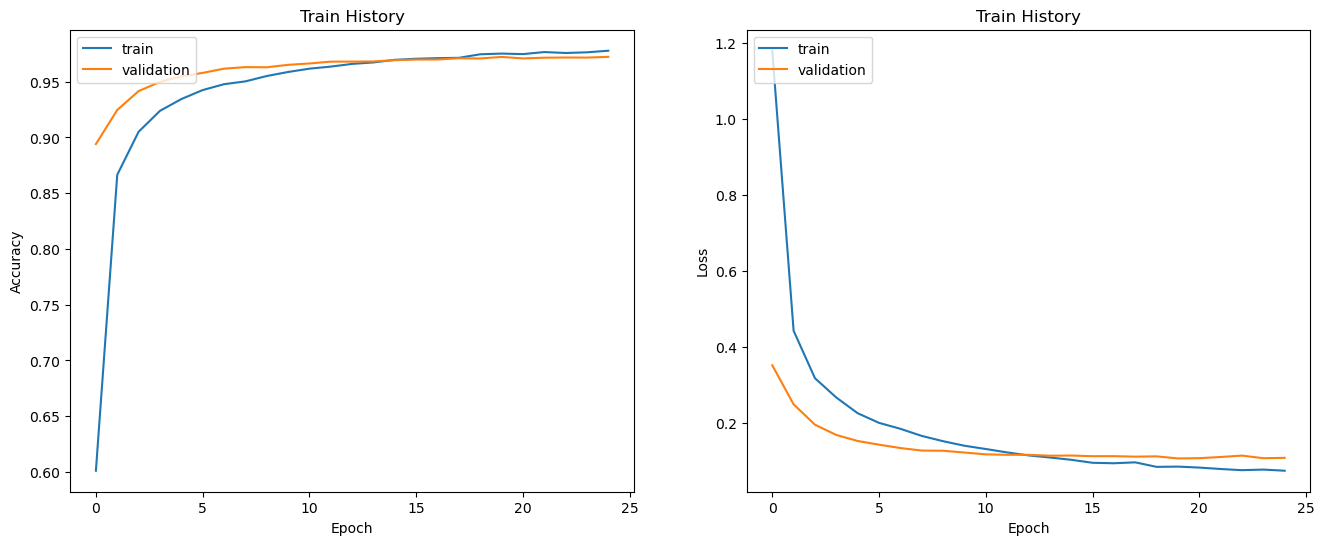

Model trained with 60.0% of the training set as validation set, with test loss: 0.10483261942863464 and test accuracy: 0.972100019454956


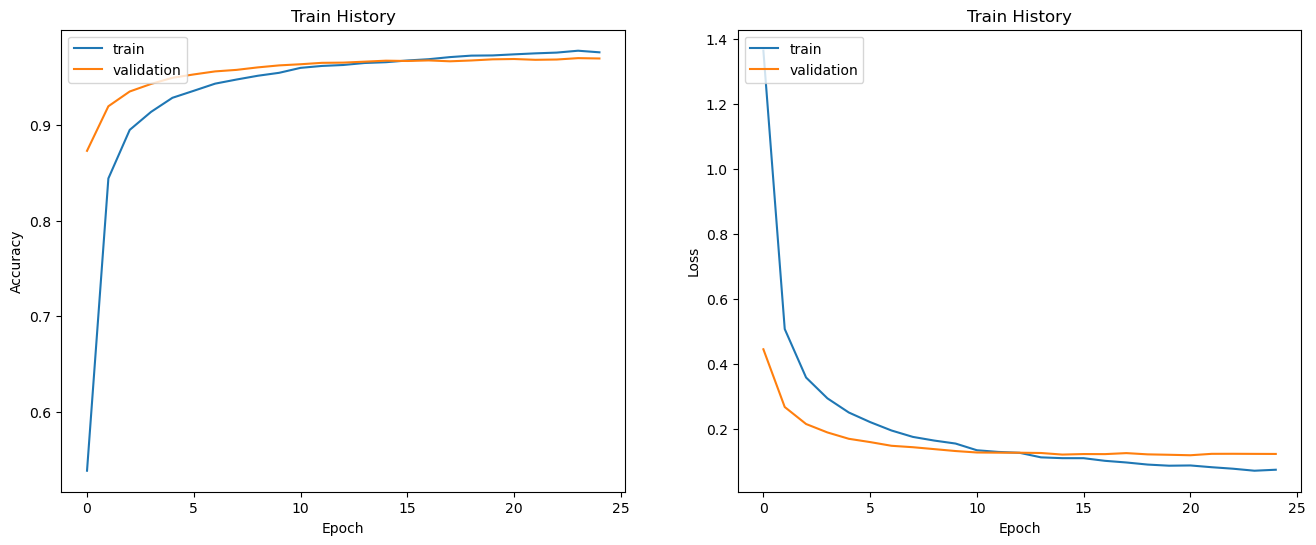

Model trained with 70.0% of the training set as validation set, with test loss: 0.12115971744060516 and test accuracy: 0.9686999917030334


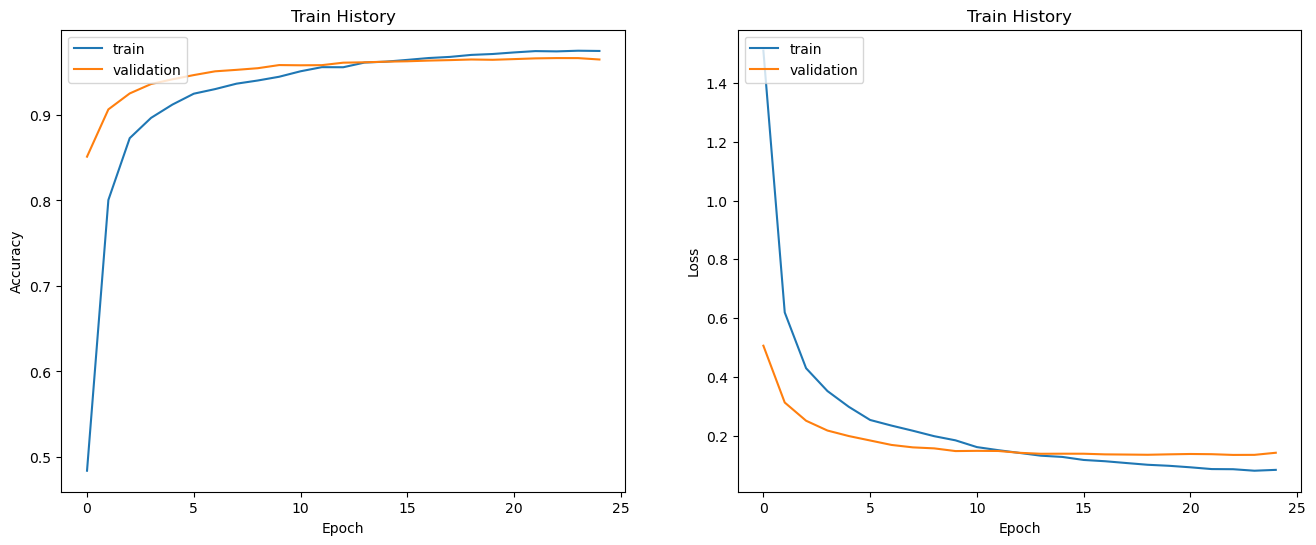

Model trained with 80.0% of the training set as validation set, with test loss: 0.15955933928489685 and test accuracy: 0.9603000283241272


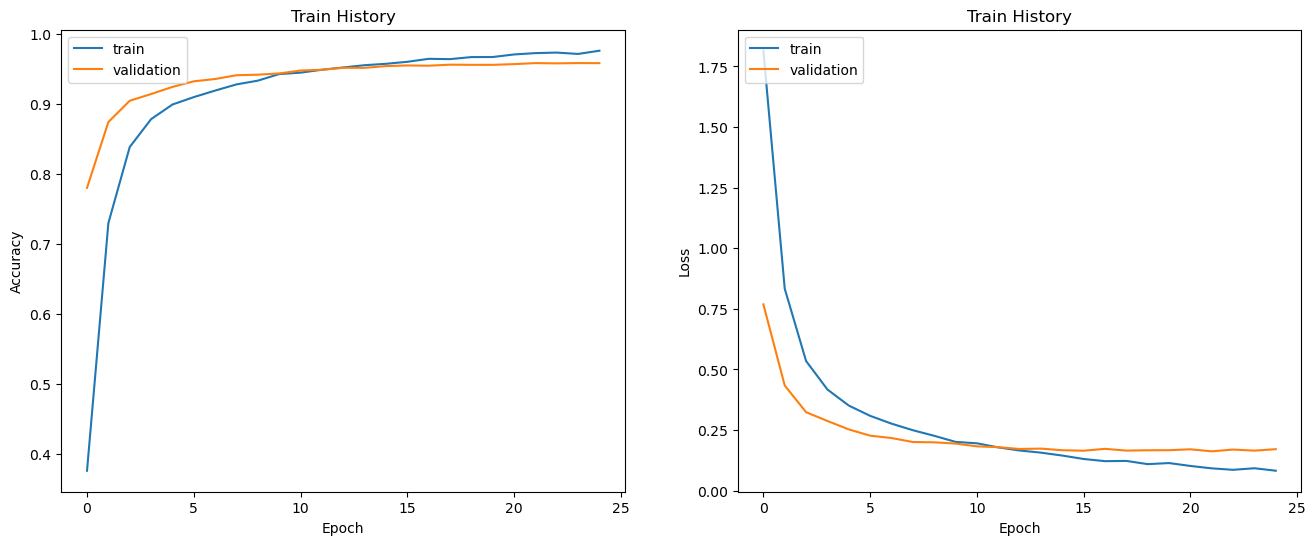

Model trained with 90.0% of the training set as validation set, with test loss: 0.2071671336889267 and test accuracy: 0.9452000260353088


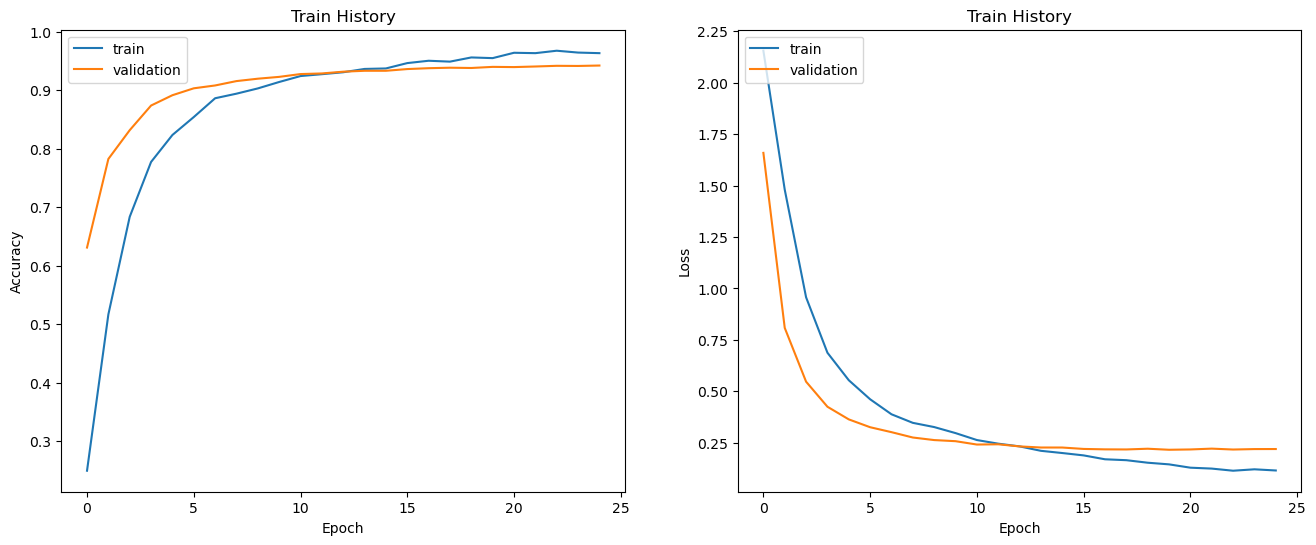

In [19]:
# Explore the impact of training set size on training and testing performance (keep the same testing set while varying the training set)

# We are going to use the model with the highest accuracy for this problem (that had 20% of the training set as validation set).
hidden_layers = 2
epochs = 25
batch_size = 512
validation_splits = np.array(np.arange(0.1, 1, 0.1))
histories = {}

for i, val_split in enumerate(validation_splits):
        model = Sequential()
        model.add(Input(shape=(train_images.shape[1],))) # Input Layer

        for h_layer in np.arange(hidden_layers + 1): # Hidden Layers
                model.add(Dense(256, activation='relu'))
                model.add(Dropout(0.5))

        model.add(Dense(num_classes, activation='softmax')) # Output Layer

        model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=val_split, verbose=0)
        test_loss, acc = model.evaluate(test_images, test_labels, verbose=0)
        print(f'Model trained with {np.round(val_split*100,2)}% of the training set as validation set, with test loss: {test_loss} and test accuracy: {acc}')
        show_train_history(history)     

We can see that when we are increasing the percentage of the training set as validation set, the model does not have enough data to train on. We can also see that in some plots, the train accuracy is higher than the validation accuracy. That is because I use Dropout layers in my model, when training 50% of the features are set to zero but when testing, all features are used. Hence, the model at test time is more robust and can lead to higher validation accuracies. Finally, increasion the validation set, decreases our test accuracy and increases the test loss.

Using MLPs for image classification is very dumb, that's why we have CNNs :D. They have less parameters and classify better (higher accuracies). 